# <font color='Red'>Final Project - CPS 806 Machine Learning F2021</font>

# Credit Card Fraud Detection Using Machine Learning

# <font color='Green'>**Group-06**</font>
# <font color='Green'>Name:Linh Le 500895991 </font>
# <font color='Green'>Name:Bradley Pahati 500829758 </font>
# <font color='Green'>Name:Anh Phung 500895992 </font>
# <font color='Green'>Name:Tusaif Azmat 500660278 </font>

# <font color='Navy Blue'>Problem to solve: Credit Card Fraud Detection </font>
<font color='Maroon'>**The objective for this project is to build machine learning models to classify or identify fraudulent card transactions from a given set of card transaction data. We want to predict if the transaction is fraudulent based on the input attributes and identify it as fraudulent or genuine.** </font>

<font color='Maroon'>**The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. We downloaded the data from https://www.kaggle.com/mlg-ulb/creditcardfraud.** </font>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
## Naive Bayse
from sklearn.naive_bayes import GaussianNB
##Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#oversampling
from imblearn.over_sampling import SMOTE
#Cross validations
from sklearn.model_selection import cross_val_score

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve

# Plotting options
%matplotlib inline

In [2]:
data_f = pd.read_csv('creditcard.csv')

# 1: Data Exploration

In [3]:
data_f.shape

(284807, 31)

In [4]:
data_f.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78546,57580.0,-2.996513,-0.135466,2.198312,0.069924,-0.341967,-0.420372,0.154054,-0.292945,0.874003,...,-0.267124,0.518645,0.337625,0.564798,0.236132,0.339641,-0.259024,-0.094020,56.75,0
204466,135296.0,1.981511,-0.094518,-0.384720,0.427720,-0.831047,-1.732214,-0.016891,-0.305456,0.532562,...,-0.402998,-1.200192,0.666358,0.870064,-0.854185,-0.035765,-0.069185,-0.039395,6.15,0
10394,16750.0,-2.106058,1.945830,0.299126,-1.173016,-0.556718,-0.065628,-0.741967,1.407596,0.813595,...,-0.259809,-0.726520,-0.007314,-0.858960,-0.059452,0.684484,0.078900,0.049865,6.04,0
52684,45588.0,1.379631,-0.355981,-0.093639,-0.623674,-0.643501,-1.132860,-0.120703,-0.273602,-1.123212,...,0.236110,0.628802,-0.091465,0.432914,0.663511,-0.074217,-0.014544,0.001243,15.00,0
19526,30357.0,1.186853,-0.220765,0.693078,0.291085,-0.857508,-0.507070,-0.334767,0.038423,0.507867,...,-0.070996,-0.028140,-0.025779,0.619003,0.340827,1.023531,-0.069028,-0.006102,10.00,0
133227,80300.0,-0.288496,-0.154532,1.849298,-0.838514,-0.902036,0.107294,-0.345737,0.187286,-1.189529,...,-0.145535,0.087219,-0.090135,0.058793,-0.469658,1.184513,0.084329,0.117679,33.70,0
97724,66355.0,1.127802,0.108185,0.441482,1.163342,-0.521787,-0.877121,0.104332,-0.149754,0.177589,...,-0.049707,-0.274672,-0.039850,0.339798,0.464857,-0.466884,0.009838,0.034389,57.00,0
57781,48073.0,-1.847001,-0.996573,2.023449,-2.799413,-0.619314,-0.772027,0.527682,0.236328,1.215776,...,0.338499,0.561425,0.200928,0.339478,0.752751,-0.077980,0.163429,0.134157,225.63,0
9482,14057.0,1.083537,-0.485675,0.940875,-0.461137,-1.139804,-0.668618,-0.529329,-0.182664,3.002159,...,0.046635,0.503079,-0.215438,0.346511,0.606579,-0.578811,0.057062,0.043328,90.00,0
131239,79530.0,1.126310,-0.099432,-0.098993,1.555512,1.700556,4.420202,-1.100771,1.157203,-0.023955,...,-0.122548,-0.414695,-0.015070,0.993707,0.446488,-0.030981,0.039856,0.033860,28.67,0


In [5]:
data_f['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
data_f['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

**Note:Only 0.17% (492 out of 284,807) transactions are fraudulent.
       That means the Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset.**

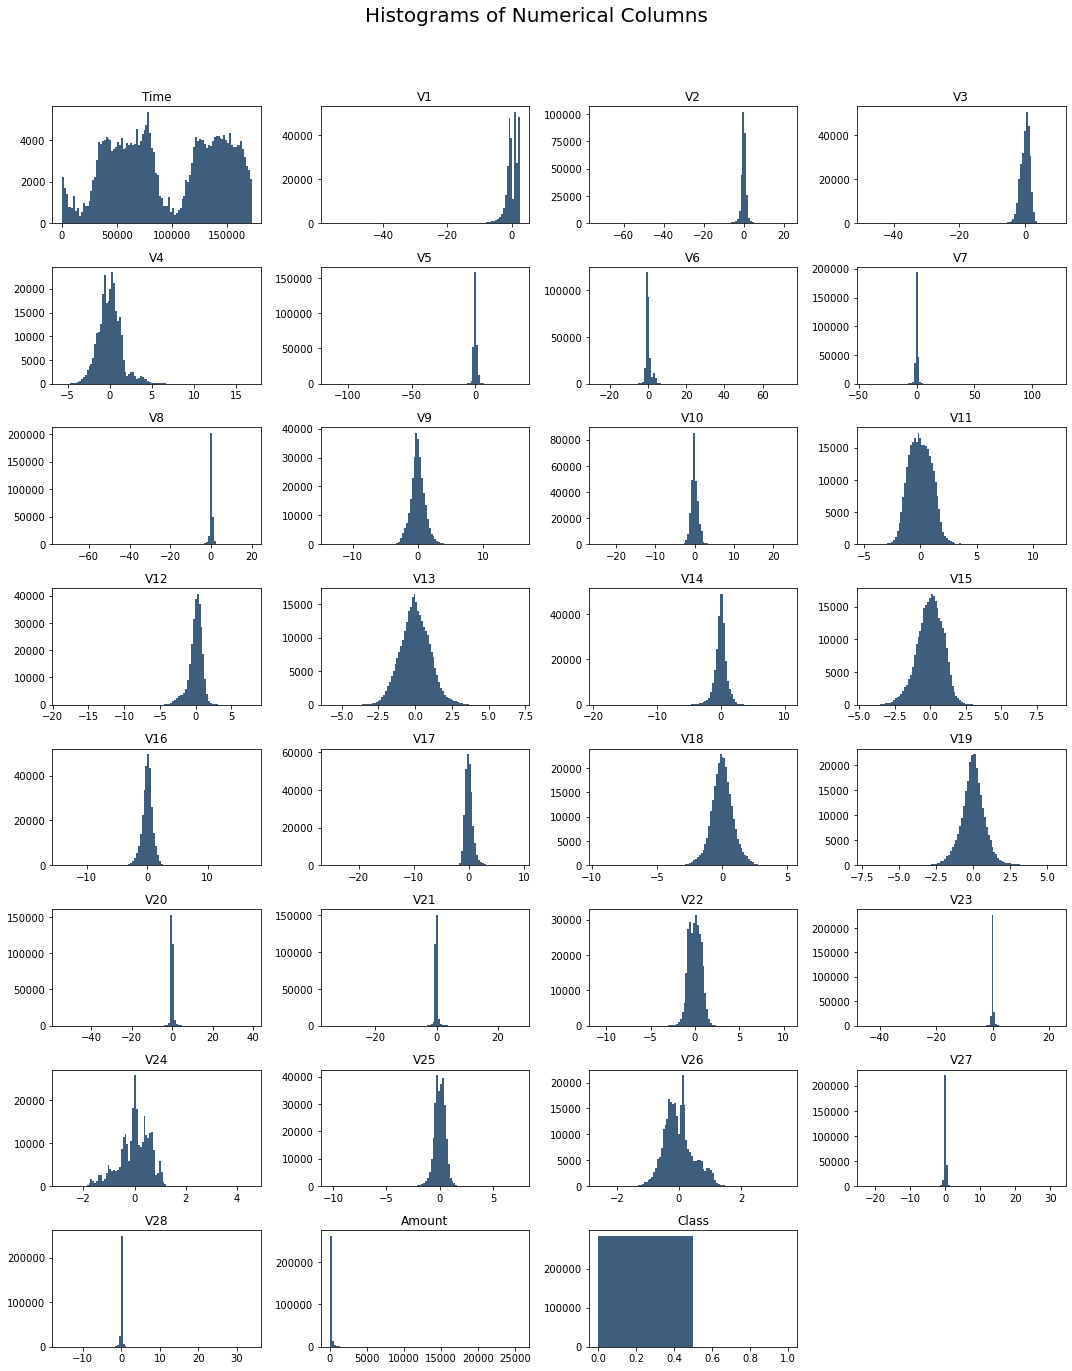

In [7]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data_f.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data_f.columns.values[i])

    vals = np.size(data_f.iloc[:, i].unique())
    if vals >= 100:
        vals = 100          # limit our bins to 100 maximum
    
    plt.hist(data_f.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Note: From the above plots, we can observe a large prevalence of Class 0 (non fraudulent).**

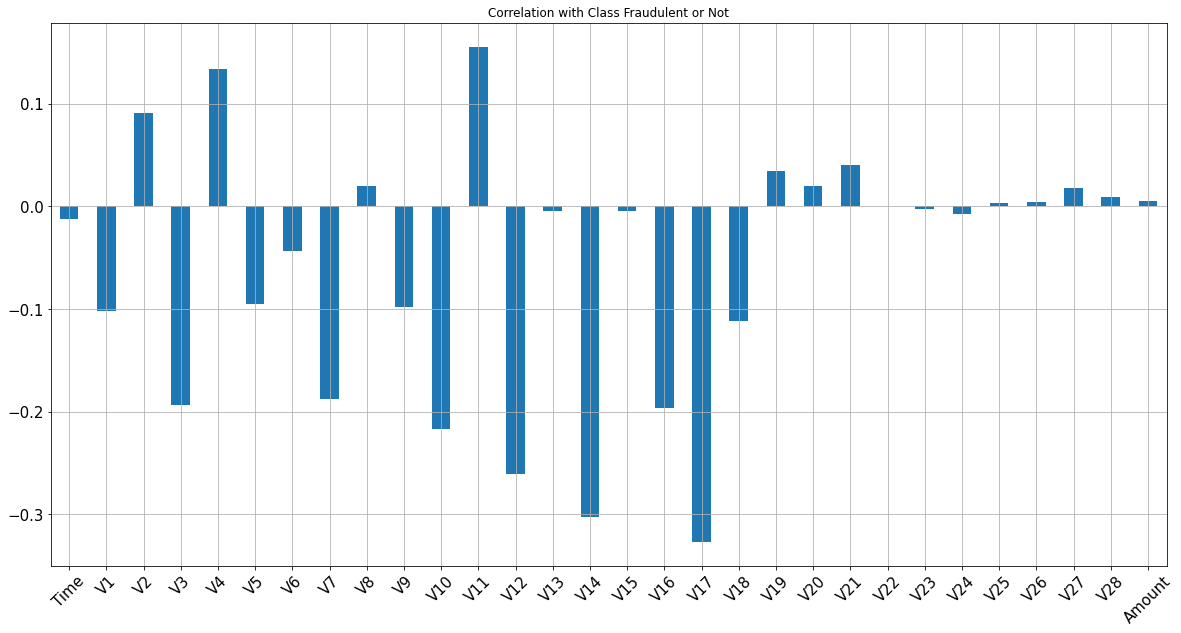

In [8]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2_f = data_f.drop(columns = ['Class'])   # drop non numerical columns
data2_f.corrwith(data_f.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

# 2: Data Pre-processing

In [3]:
data_f['normalizedAmount'] = StandardScaler().fit_transform(data_f['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data_f = data_f.drop(['Amount'],axis=1)
data_f.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
data_f = data_f.drop(['Time'],axis=1)
data_f.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


**Note: Data is in normalized form to do the further evaluations.**

# 3: Train / Test Split

**Note:- Before we begin preprocessing, we split off a test data set. First split the data into features and response variable:**

In [5]:
X = data_f.iloc[:, data_f.columns != 'Class']
y = data_f.iloc[:, data_f.columns == 'Class']  # Response variable determining if fraudulent or not

We'll use a test size of 30%. We also stratify the split on the response variable, 
which is very important to do because there are so few fraudulent transactions.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [13]:
X_train.shape

(199364, 29)

In [14]:
X_test.shape

(85443, 29)

# 4: Data Modeling

Now we're ready to build machine learning models to predict whether a transaction is fraudulent. 
We'll train the following models:

**a: K-Nearest Neighbors.**

**b: Decision Tree.**

**c: Support Vector Machine.**

**d: Logistic Regression.**

**e: Naive Bayes.**

**f: Random Forest.**

**g:Neural Network Model.**


In [15]:
# Approach to plot confusion matrix (from scikit-learn.org site)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

**a: K-Nearest Neighbors**

In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [21]:
knn.score(X_test,y_test)


0.9994382219725431

Confusion matrix, without normalization
[[85289     7]
 [   41   106]]


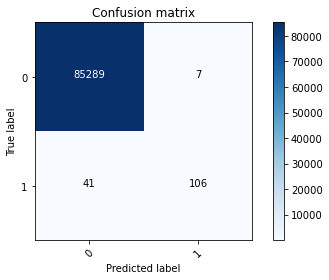

In [22]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

while only 7 regular transactions are wrongly predicted as fraudulent, the model only detects 80% of the fraudulent transactions. As a consequence 41 fraudulent transactions are not detected (False Negatives).
Let's see if we can improve this performance with other machine learning models in the rest of the notebook.

In [23]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9994 	precision:0.9381 	recall:0.7211 	F1-score:0.8154


In [24]:
### Store results in dataframe for comparing various Models
results_testset = pd.DataFrame([['KNN  ', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,KNN,0.999438,0.278912,0.721088,0.938053,0.815385


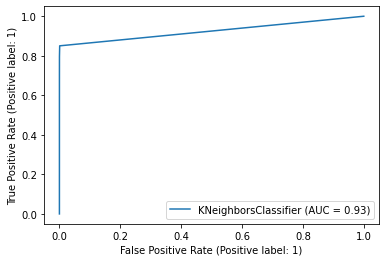

In [25]:
ROC_DT = plot_roc_curve(knn, X_test, y_test)
plt.show()

**b: Decision Tree**

In [26]:
decision_tree = DecisionTreeClassifier()

In [27]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [28]:
y_pred = decision_tree.predict(X_test)

In [29]:
decision_tree.score(X_test,y_test)

0.9993211848834895


Confusion matrix, without normalization
[[85271    25]
 [   33   114]]


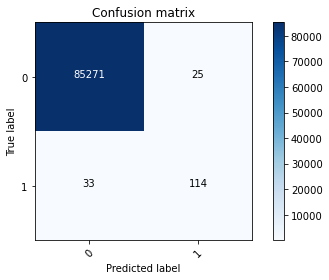

In [30]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [31]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [32]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,KNN,0.999438,0.278912,0.721088,0.938053,0.815385
1,DecisionTree,0.999321,0.224490,0.775510,0.820144,0.797203


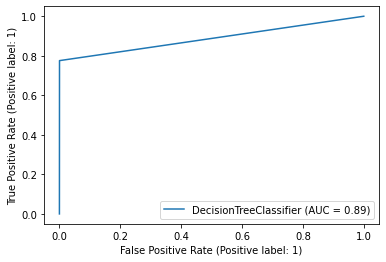

In [33]:
ROC_DT = plot_roc_curve(decision_tree, X_test, y_test)
plt.show()

**c: Support Vector Machine**

In [34]:
svm_clf = SVC()

In [35]:
svm_clf.fit(X_train,y_train.values.ravel())

SVC()

In [36]:
y_pred = svm_clf.predict(X_test)

In [37]:
svm_clf.score(X_test,y_test)

0.9993445923013002


Confusion matrix, without normalization
[[85291     5]
 [   51    96]]


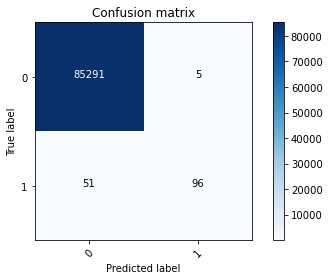

In [38]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [39]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [40]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['SVM  ', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,KNN,0.999438,0.278912,0.721088,0.938053,0.815385
1,DecisionTree,0.999321,0.224490,0.775510,0.820144,0.797203
2,SVM,0.999345,0.346939,0.653061,0.950495,0.774194


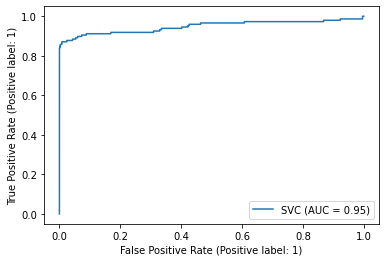

In [41]:
ROC_DT = plot_roc_curve(svm_clf, X_test, y_test)
plt.show()

**d: Logistic Regression** 

In [42]:
lr_clf = LogisticRegression()

In [43]:
lr_clf.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [44]:
y_pred = lr_clf.predict(X_test)

In [45]:
lr_clf.score(X_test,y_test)

0.999204147794436


Confusion matrix, without normalization
[[85284    12]
 [   56    91]]


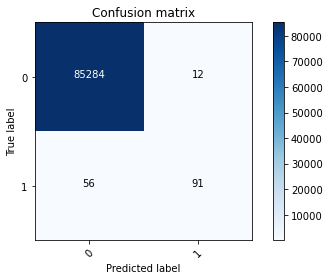

In [46]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [47]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [48]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['Logistic Regression  ', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,KNN,0.999438,0.278912,0.721088,0.938053,0.815385
1,DecisionTree,0.999321,0.224490,0.775510,0.820144,0.797203
2,SVM,0.999345,0.346939,0.653061,0.950495,0.774194
3,Logistic Regression,0.999204,0.380952,0.619048,0.883495,0.728000


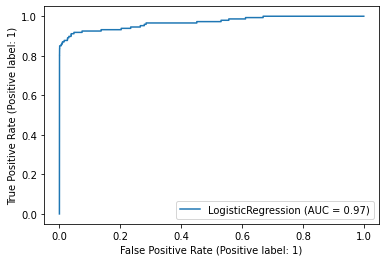

In [49]:
ROC_DT = plot_roc_curve(lr_clf, X_test, y_test)
plt.show()

**e: Naive Bayes**

In [50]:
nb_clf= GaussianNB()

In [51]:
nb_clf.fit(X_train,y_train.values.ravel())

GaussianNB()

In [52]:
y_pred = nb_clf.predict(X_test)

In [53]:
nb_clf.score(X_test,y_test)

0.9784066570696254


Confusion matrix, without normalization
[[83475  1821]
 [   24   123]]


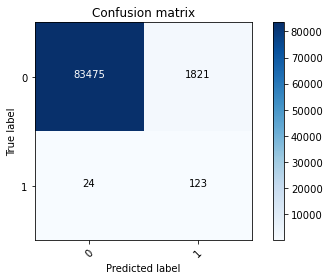

In [54]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [55]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [56]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['Naive Bayes ', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,KNN,0.999438,0.278912,0.721088,0.938053,0.815385
1,DecisionTree,0.999321,0.224490,0.775510,0.820144,0.797203
2,SVM,0.999345,0.346939,0.653061,0.950495,0.774194
3,Logistic Regression,0.999204,0.380952,0.619048,0.883495,0.728000
4,Naive Bayes,0.978407,0.163265,0.836735,0.063272,0.117647


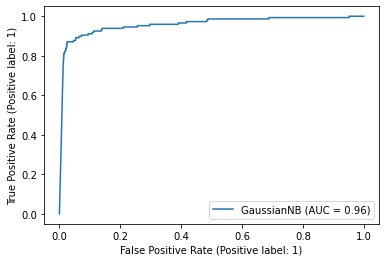

In [57]:
ROC_DT = plot_roc_curve(nb_clf, X_test, y_test)
plt.show()

**f: Random Forest**

In [58]:
rf_clf = RandomForestClassifier(n_estimators=100)

In [59]:
rf_clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [60]:
y_pred = rf_clf.predict(X_test)

In [61]:
rf_clf.score(X_test,y_test)

0.9994850368081645


Confusion matrix, without normalization
[[85289     7]
 [   37   110]]


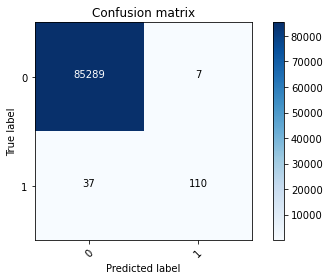

In [62]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [63]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [64]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['Random Forest ', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,KNN,0.999438,0.278912,0.721088,0.938053,0.815385
1,DecisionTree,0.999321,0.224490,0.775510,0.820144,0.797203
2,SVM,0.999345,0.346939,0.653061,0.950495,0.774194
3,Logistic Regression,0.999204,0.380952,0.619048,0.883495,0.728000
4,Naive Bayes,0.978407,0.163265,0.836735,0.063272,0.117647
5,Random Forest,0.999485,0.251701,0.748299,0.940171,0.833333


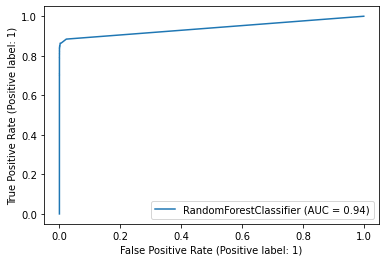

In [65]:
ROC_DT = plot_roc_curve(rf_clf, X_test, y_test)
plt.show()

**g:Neural Network Model**

We will use a simple NN made of 5 fully-connected layers with ReLu activation.

The NN takes a vector of length 29 as input. 

This represents the information related to each transactions, i-e each line with 29 columns from the dataset. 

For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not fraudulent (0) or fraudulent (1).
a dropout step is included to prevent overfitting.

In [66]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [67]:
nn_model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [68]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,113
Trainable params: 2,113
Non-trainabl

Training:

In [69]:
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
nn_model.fit(X_train,y_train,batch_size=15,epochs=10)

Epoch 1/5
13291/13291 [==============================] - 111s 7ms/step - loss: 0.0107 - accuracy: 0.99802s - l - ETA: 1s - loss:
Epoch 2/5
13291/13291 [==============================] - 95s 7ms/step - loss: 0.0041 - accuracy: 0.9994 0s - loss: 0.0041 - accura - ETA: 0s - loss: 0
Epoch 3/5
13291/13291 [==============================] - 116s 9ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 124s 9ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 140s 10ms/step - loss: 0.0034 - accuracy: 0.9994


In [70]:
nn_model.evaluate(X_test, y_test)

2671/2671 [==============================] - 44s 7ms/step - loss: 0.0033 - accuracy: 0.9994 5s - l - E - ETA: 2s - loss: 0.0029 - accuracy: 0. - ETA: 2s - loss: 0.003 - E - ETA: 0s - loss: 0.0031 - accu - ETA: 0s - loss: 0.003
[0.0032849351409822702, 0.9994031190872192]


The model achieves an accuracy of 99.94% !

Remember that our dataset is significantly composed of non fraudulent samples 
with only 172 fraudulent transactions per 100,000. 

Consequently, a model predicting every transaction as 'non fraudulent' would achieve 99.93% accuracy despite being unable to detect a single fraudulent case !

In [71]:
# Alternative approach to plot confusion matrix (from scikit-learn.org site)
y_pred = nn_model.predict(X_test)
y_test = pd.DataFrame(y_test) 

In [72]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())   # y_pred.round() to convert probability to either 0 or 1 in line with y_test

Confusion matrix, without normalization
[[85279    17]
 [   34   113]]


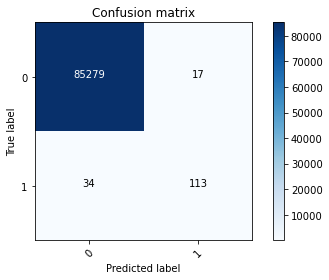

In [73]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Detection of fraudulent transactions did not improve compared to the previous machine learning models.

110 fraudulent transactions are detected as fraudulent by the model, yet 37 fraudulent transactions are not identified (false negative) which remains an issue. 

Our objective must be to detect as many fraudulent transactions as possible since these can have a huge negative impact.

17 regular transactions are detected as potentially fraudulent by the model. 
These are false positive. This number is negligible.

Conclusion : We must find ways to further reduce the number of false negative.

In [74]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [75]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,KNN,0.999438,0.278912,0.721088,0.938053,0.815385
1,DecisionTree,0.999321,0.224490,0.775510,0.820144,0.797203
2,SVM,0.999345,0.346939,0.653061,0.950495,0.774194
3,Logistic Regression,0.999204,0.380952,0.619048,0.883495,0.728000
4,Naive Bayes,0.978407,0.163265,0.836735,0.063272,0.117647
5,Random Forest,0.999485,0.251701,0.748299,0.940171,0.833333
6,PlainNeuralNetwork,0.999403,0.231293,0.768707,0.869231,0.815884


# 5: Oversampling Technique to reduce the false negative rate for the models.

**Synthetic Minority Oversample TEchnique (SMOTE)**

OverSampling can be achieved with the SMOTE method where a new vector is generated between 2 existing datapoints. 

Applying this technique allows to massively increase the number of fraudulent transactions.

In [89]:
oversample = SMOTE()
X_resample, y_resample = oversample.fit_resample(X,y.values.ravel())

In [90]:
print('Number of total transactions--> before SMOTE upsampling: ', len(y), '-->after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions--> before SMOTE upsampling: ', len(y[y.Class==1]), 
      '-->after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions--> before SMOTE upsampling:  284807 -->after SMOTE upsampling:  568630
Number of fraudulent transactions--> before SMOTE upsampling:  492 -->after SMOTE upsampling:  284315


In [91]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [93]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [94]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [95]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=10)

Epoch 1/10
26537/26537 [==============================] - 197s 7ms/step - loss: 0.0524 - accuracy: 0.9800
Epoch 2/10
26537/26537 [==============================] - 186s 7ms/step - loss: 0.0221 - accuracy: 0.9928
Epoch 3/10
26537/26537 [==============================] - 194s 7ms/step - loss: 0.0176 - accuracy: 0.9947
Epoch 4/10
26537/26537 [==============================] - 187s 7ms/step - loss: 0.0153 - accuracy: 0.99560s - loss:
Epoch 5/10
26537/26537 [==============================] - 190s 7ms/step - loss: 0.0134 - accuracy: 0.9963
Epoch 6/10
26537/26537 [==============================] - 193s 7ms/step - loss: 0.0121 - accuracy: 0.9967
Epoch 7/10
26537/26537 [==============================] - 185s 7ms/step - loss: 0.0113 - accuracy: 0.9970
Epoch 8/10
26537/26537 [==============================] - 192s 7ms/step - loss: 0.0102 - accuracy: 0.9973
Epoch 9/10
26537/26537 [==============================] - 201s 8ms/step - loss: 0.0100 - accuracy: 0.9976
Epoch 10/10
26537/26537 [===========

Confusion matrix, without normalization
[[85065   299]
 [    6 85219]]


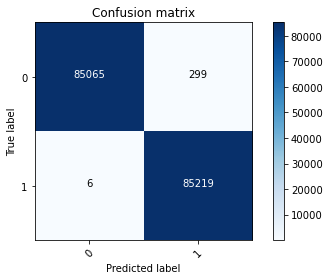

In [96]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

**Note the Low value of False Negatives. The model is able to detect almost all fraudulent transactions on the full dataset.**

**Note the limited number of False Positives which means a lot less verification work (on legitimate transactions) for the fraud departement.**

In [97]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [98]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,KNN,0.999438,0.278912,0.721088,0.938053,0.815385
1,DecisionTree,0.999321,0.224490,0.775510,0.820144,0.797203
2,SVM,0.999345,0.346939,0.653061,0.950495,0.774194
3,Logistic Regression,0.999204,0.380952,0.619048,0.883495,0.728000
4,Naive Bayes,0.978407,0.163265,0.836735,0.063272,0.117647
5,Random Forest,0.999485,0.251701,0.748299,0.940171,0.833333
6,PlainNeuralNetwork,0.999403,0.231293,0.768707,0.869231,0.815884
7,OverSampledNeuralNetwork,0.998523,0.000702,0.999298,0.997756,0.998526
8,OverSampledNeuralNetwork,0.998212,0.000070,0.999930,0.996504,0.998214


Confusion matrix, without normalization
[[283387    928]
 [     1    491]]


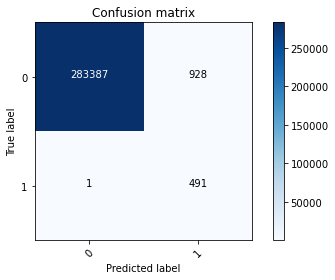

In [99]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

**Note the zero value of False Negatives. The model is able to detect all fraudulent transactions on the full dataset.**

**Note the limited number of False Positives which means a lot less verification work (on legitimate transactions) for the fraud departement.**

In [100]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [101]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_testset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,KNN,0.999438,0.278912,0.721088,0.938053,0.815385
1,DecisionTree,0.999321,0.224490,0.775510,0.820144,0.797203
2,SVM,0.999345,0.346939,0.653061,0.950495,0.774194
3,Logistic Regression,0.999204,0.380952,0.619048,0.883495,0.728000
4,Naive Bayes,0.978407,0.163265,0.836735,0.063272,0.117647
5,Random Forest,0.999485,0.251701,0.748299,0.940171,0.833333
6,PlainNeuralNetwork,0.999403,0.231293,0.768707,0.869231,0.815884
7,OverSampledNeuralNetwork,0.998523,0.000702,0.999298,0.997756,0.998526
8,OverSampledNeuralNetwork,0.998212,0.000070,0.999930,0.996504,0.998214
9,OverSampledNeuralNetwork,0.996738,0.002033,0.997967,0.346018,0.513867


**Note: All metrics are excellent for this last model.**

# Hyper parameter turning & cross Fold

**Cross Validation** is a very useful technique for assessing the performance of machine learning models.

It helps in knowing how the machine learning model would generalize to an independent data set and to estimate how accurate your model will predict in practice.

In [7]:
ACC_test_lr = cross_val_score(LogisticRegression(),X,y.values.ravel())

In [8]:
ACC_test_lr

array([0.99899933, 0.99933289, 0.99894665, 0.99931532, 0.99903443])

In [9]:
ACC_test_dt = cross_val_score(DecisionTreeClassifier(),X,y.values.ravel())

In [10]:
ACC_test_dt

array([0.99801622, 0.99949089, 0.99603237, 0.99889398, 0.99894665])

In [11]:
ACC_test_svm = cross_val_score(SVC(),X,y.values.ravel())

In [12]:
ACC_test_svm

array([0.998736  , 0.99906956, 0.9989642 , 0.99884131, 0.99926265])

In [14]:
from sklearn.model_selection import StratifiedKFold
ACC_test_rf4 = cross_val_score(RandomForestClassifier(),X,y.values.ravel(),cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_rf4)

[0.99956111 0.99963133 0.99931532 0.99949088 0.99963133]


In [15]:
ACC_test_nb = cross_val_score(GaussianNB(),X,y.values.ravel())

In [16]:
ACC_test_nb

array([0.97644043, 0.9782311 , 0.97975808, 0.97371886, 0.98031987])

In [19]:
ACC_test_lr_mean = np.mean(ACC_test_lr);
ACC_test_dt_mean = np.mean(ACC_test_dt);
ACC_test_svm_mean = np.mean(ACC_test_svm);
ACC_test_rf_mean = np.mean(ACC_test_rf4);
ACC_test_nb_mean = np.mean(ACC_test_nb);

In [23]:
from prettytable import PrettyTable
t = PrettyTable(['KVC Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)'])
t.add_row(['Testing Models', ACC_test_lr_mean*100, ACC_test_dt_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100, ACC_test_nb_mean*100])
print(t)

+----------------+-------------------+-------------------+-------------------+------------------+-------------------+
|  KVC Accuracy  |    Logistic (%)   |       DT (%)      |      SVM (%)      |      RF (%)      |       NB (%)      |
+----------------+-------------------+-------------------+-------------------+------------------+-------------------+
| Testing Models | 99.91257234521112 | 99.82760221656571 | 99.89747448059039 | 99.9525994303316 | 97.76936687504244 |
+----------------+-------------------+-------------------+-------------------+------------------+-------------------+
